In [1]:
import numpy as np
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import nibabel as nib
import pandas as pd
from IPython.display import clear_output
import importlib
from skimage import morphology
from skimage.segmentation import find_boundaries
import porespy as ps
from skimage.morphology import disk, binary_dilation

In [2]:
sys.path.insert(1, "/Users/dvarelat/Documents/MASTER/TFM/methods")
import cardiac_region
importlib.reload(cardiac_region)
import cardiac_region as c

In [3]:
ESPECIMEN = "20190404_E2"

In [4]:
cellpose_nu = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/nuclei/{ESPECIMEN}_MASK_EQ_XYZ_decon.nii.gz"
gasp_mem = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/RESULTS/membranes/GASP_PNAS/{ESPECIMEN}_mGFP_XYZ_predictions_GASP.nii.gz"
nuclei = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/DAPI/{ESPECIMEN}_DAPI_decon_0.5.nii.gz"
mem = f"/Users/dvarelat/Documents/MASTER/TFM/DATA/DECON_05/MGFP/{ESPECIMEN}_mGFP_decon_0.5.nii.gz"


In [5]:
pred_nu = nib.load(cellpose_nu).get_fdata()
pred_nu.shape

(1024, 1024, 448)

In [6]:
pred_mem = nib.load(gasp_mem).get_fdata()
pred_mem.shape

(1024, 1024, 448)

In [7]:
DAPI = nib.load(nuclei).get_fdata()
DAPI = DAPI[:,:,:,0]
DAPI.shape

(1024, 1024, 448)

In [8]:
MEM = nib.load(mem).get_fdata()
MEM = MEM[:,:,:,0]
MEM.shape

(1024, 1024, 448)

In [46]:
bound_mem = find_boundaries(pred_mem)

## Solo nuclei dentro del mesodermo

In [9]:
mask_mem = np.where(pred_mem != 0, True, False)

In [10]:
mask_on_nuclei = mask_mem * pred_nu
mask_on_nuclei.shape

(1024, 1024, 448)

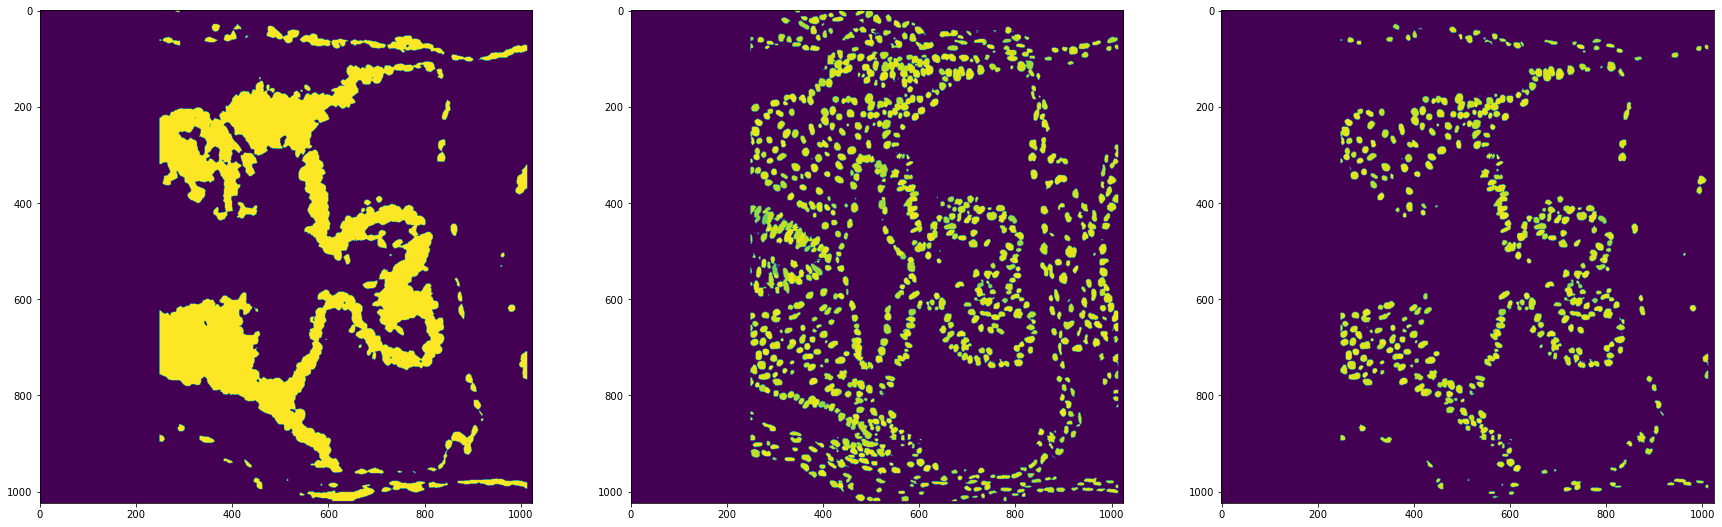

In [11]:
n = 200
plt.figure(figsize=(30,30))
plots = [mask_mem[:, :, n], pred_nu[:, :, n], mask_on_nuclei[:,:,n]]
for i in range(len(plots)):
    plt.subplot(1,len(plots), i+1)
    plt.imshow(plots[i])

### Props membranes

In [12]:
img_mem = morphology.label(pred_mem)
props_mem = ps.metrics.regionprops_3D(img_mem)

In [13]:
len(props_mem)

11578

### Oiginal labels from centroid

In [13]:
print(len(props_mem))
centroids_mem = [[round(i) for i in p["centroid"]] for p in props_mem]

11578


In [14]:
original_labels_centroids = [img_mem[c[0],c[1],c[2]] for c in centroids_mem]

### DF and Filtrar por tamaño

In [15]:
df = pd.DataFrame({"cell_in_props":range(len(props_mem)),
                  "volumes": [p.volume for p in props_mem], 
                  "original_labels":original_labels_centroids, 
                  "centroids":centroids_mem})

In [16]:
df_clean = df[df.original_labels != 0]
df_clean = df_clean[df_clean.volumes < 1.5*np.median(df_clean.volumes)]
df_clean = df_clean[df_clean.volumes > 0.2*np.median(df_clean.volumes)]
df_clean.describe() 

,cell_in_props,volumes,original_labels
count,7826.000000,7826.000000,7826.000000
mean,6094.373754,3363.718502,6095.375032
std,3378.215746,1256.401517,3378.212553
min,0.000000,646.000000,1.000000
25%,3291.250000,2522.000000,3292.250000
50%,6203.500000,3429.500000,6204.500000
75%,9111.750000,4307.000000,9112.750000
max,11562.000000,5705.000000,11563.000000


In [17]:
df_clean.shape

(7826, 4)

### Centroid nuclei + original label

In [22]:
img_nu = morphology.label(mask_on_nuclei)
props_nu = ps.metrics.regionprops_3D(img_nu)
centroids_nu = [[round(i) for i in p["centroid"]] for p in props_nu]

In [27]:
centroids_nu[0]

[5, 255, 69]

In [19]:
NU_original_labels_centroids = [pred_nu[c[0],c[1],c[2]] for c in centroids_nu]

In [20]:
labels_centroid_nu_in_mem = [pred_mem[c[0],c[1],c[2]] for c in centroids_nu]

In [21]:
dict_nuclei_membrane_centroids = dict(zip(labels_centroid_nu_in_mem, NU_original_labels_centroids))

In [22]:
dict_memlabel_cellnumber_props_nuclei = dict(zip(labels_centroid_nu_in_mem, range(len(centroids_nu))))

In [23]:
dict_memlabel_cellnumber_props_nuclei

{1261.0: 0,
 2312.0: 1,
 3089.0: 2,
 5276.0: 3,
 8820.0: 4,
 5761.0: 5,
 2512.0: 9,
 5760.0: 11,
 1365.0: 8,
 2216.0: 10,
 1579.0: 12,
 3090.0: 13,
 2374.0: 14,
 3552.0: 15,
 7542.0: 16,
 2261.0: 847,
 3977.0: 18,
 1631.0: 19,
 3025.0: 20,
 6441.0: 22,
 1689.0: 23,
 4234.0: 24,
 2877.0: 25,
 2510.0: 26,
 2953.0: 27,
 1743.0: 28,
 6187.0: 244,
 6804.0: 31,
 4047.0: 32,
 3026.0: 33,
 1688.0: 34,
 903.0: 245,
 2874.0: 37,
 3625.0: 38,
 7167.0: 39,
 1976.0: 40,
 6673.0: 41,
 1121.0: 43,
 3771.0: 44,
 1837.0: 45,
 2951.0: 46,
 4884.0: 47,
 3091.0: 48,
 1836.0: 122,
 4373.0: 50,
 5494.0: 51,
 3027.0: 52,
 3975.0: 234,
 7055.0: 55,
 1886.0: 56,
 5343.0: 192,
 3495.0: 59,
 1977.0: 65,
 3910.0: 68,
 3028.0: 69,
 5434.0: 125,
 1835.0: 71,
 1329.0: 72,
 6875.0: 75,
 5277.0: 74,
 2632.0: 79,
 4773.0: 77,
 5609.0: 78,
 2036.0: 80,
 3976.0: 81,
 4992.0: 82,
 6805.0: 83,
 2875.0: 86,
 4112.0: 85,
 6479.0: 88,
 4183.0: 89,
 5044.0: 90,
 1632.0: 91,
 6391.0: 92,
 4436.0: 126,
 2097.0: 94,
 6285.0: 96,


In [24]:
df_clean["nuclei_label_cent"] = [dict_nuclei_membrane_centroids[label] if label in labels_centroid_nu_in_mem else -1 for label in df_clean.original_labels]


In [25]:
df_clean["nuclei_cell_in_props"] = [dict_memlabel_cellnumber_props_nuclei[label] if label in labels_centroid_nu_in_mem else -1 for label in df_clean.original_labels]

In [ ]:
df_clean[df_clean.nuclei_label_cent == -1]

### CHECK PAIR

In [34]:
FILE = "/Users/dvarelat/Documents/MASTER/TFM/DATA/EXTRACTION/7_20190404_E2/cell_properties.csv"
df = pd.read_csv(FILE)

In [32]:
df.describe()

,cell_in_props,volumes,sphericities,original_labels,lines,axis_major_length,axis_minor_length,nuclei_label_cent,nuclei_cell_in_props,eccentricity3d,solidity,feret_diameter_max
count,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000
mean,6094.373754,3363.718502,0.682961,5546.651929,2.115257,26.928796,13.924194,5808.051239,5096.554178,0.354599,0.806782,28.588126
std,3378.215746,1256.401517,0.066902,3368.146912,2.186629,6.233576,2.470203,5576.326389,4187.730955,0.104019,0.057230,5.735447
min,0.000000,646.000000,0.456197,3.000000,0.000000,11.680501,4.405183,-1.000000,-1.000000,0.036000,0.495526,13.564660
25%,3291.250000,2522.000000,0.639585,2588.250000,0.000000,22.875906,12.346536,535.250000,427.500000,0.281000,0.774890,24.919872
50%,6203.500000,3429.500000,0.677622,5393.500000,1.000000,26.495612,14.131772,4631.500000,5246.500000,0.357000,0.815882,28.513155
75%,9111.750000,4307.000000,0.718517,8464.750000,5.000000,30.507928,15.657213,9326.500000,8886.750000,0.430000,0.848895,32.155870
max,11562.000000,5705.000000,1.217884,11602.000000,6.000000,84.575595,20.688091,25093.000000,12215.000000,0.641000,0.922984,71.288148


In [15]:
df[df.cell_in_props == 1580]

,cell_in_props,volumes,sphericities,original_labels,centroids,lines,axis_major_length,axis_minor_length,nuclei_label_cent,nuclei_cell_in_props,eigenvalues,eigenvectors,eccentricity3d,solidity,feret_diameter_max
1043,1580,720,0.456197,2272.0,"[122, 672, 83]",0.0,22.202852,8.504373,-1.0,-1,"[33.801, 28.265, 12.768]","[[-0.344, 0.898, 0.273], [0.865, 0.191, 0.464]...",0.405,0.495526,19.748418


In [95]:
props_nu[110].slice

(slice(0, 2, None), slice(819, 827, None), slice(113, 115, None))

In [16]:
props_mem[1580].slice

(slice(116, 131, None), slice(665, 678, None), slice(75, 94, None))

In [62]:
print(props_mem[0].slices)
props_nu[0].slices

(slice(0, 16, None), slice(248, 267, None), slice(54, 81, None))


(slice(0, 13, None), slice(248, 265, None), slice(64, 76, None))

In [85]:
test = np.zeros(img_mem.shape)
test[1, 260, 217] = 1
#test = binary_dilation(test, morphology.ball(radius=4)) 

In [82]:
np.unique(pred_mem[:10,240:280,217])

array([   0.,  864.,  937., 1019., 1261., 1365., 1366., 1447., 1889.,
       1929.])

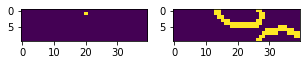

In [87]:
#x = np.where(pred_mem == 1, 0, 1)
for t in range(27):
    plt.figure(figsize=(5,5)) 
    n = 1*t
    plots = [test[:10,240:280,217], find_boundaries(img_mem[:10,240:280,217])]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [68]:
test[props_nu[0].slices].shape

(13, 17, 12)

In [29]:
np.unique(test[props_mem[0].slices])

(13, 17, 12)

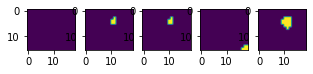

In [69]:
for t in range(27):
    plt.figure(figsize=(5,5)) 
    n = 1*t
    plots = [test[props_mem[0].slices][:,:, n], 
             props_mem[0].border[:,:, n],
             props_mem[0].image[:,:, n],
            pred_nu[props_mem[0].slices][:,:, n],
             props_mem[0].image_convex[:,:, n]
            ]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [47]:
props_nu[0].image.shape

(13, 17, 12)

In [58]:
from numpy import linalg as LA
props_mem[0].inertia_tensor_eigvals

[64.82689141304941, 57.10154244909198, 39.87607983742602]

## VER: binary - nuclei centroid + border

In [42]:
centros = np.zeros(img_nu.shape)
for i,c in enumerate(centroids_nu):
    centros[c[0],c[1], c[2]] = 1
centros = binary_dilation(centros, morphology.ball(radius=4)) 

In [ ]:
crop = [:256,:256, n]

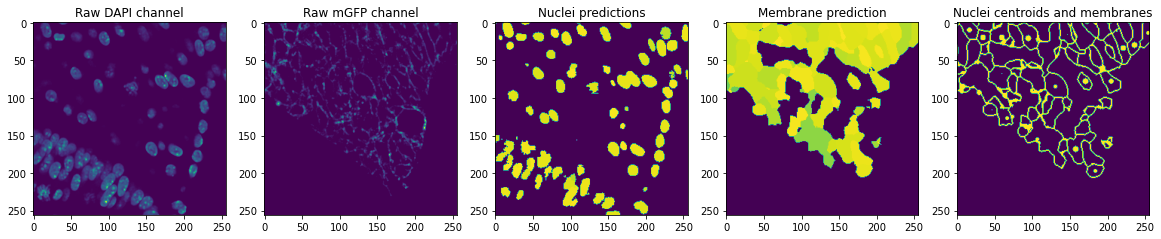

In [103]:
for t in range(24):
    plt.figure(figsize=(20,20)) 
    n = 10*t
    titles =["Raw DAPI channel", "Raw mGFP channel","Nuclei predictions",  "Membrane prediction", 
             "Nuclei centroids and membranes"]
    plots = [ DAPI[256:512,256:512, n],MEM[256:512,256:512, n],
        pred_nu[256:512,256:512, n], pred_mem[256:512,256:512, n],
    centros[256:512,256:512, n] + bound_mem[256:512,256:512, n],]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1).set_title(titles[i]) 
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [ ]:
for t in range(13):
    plt.figure(figsize=(5,5)) 
    n = 1*t
    plots = [img_mem[props_mem[20].slices][:,:, n], 
             find_boundaries(img_mem[props_mem[20].slices][:,:, n]), 
             centros[props_mem[20].slices][:,:, n]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

# COMPARE TWO CELLS

In [36]:
df[df.nuclei_cell_in_props != -1].sort_values(by=['sphericities'], ascending=True)

,cell_in_props,volumes,sphericities,original_labels,centroids,lines,axis_major_length,axis_minor_length,nuclei_label_cent,nuclei_cell_in_props,eigenvalues,eigenvectors,eccentricity3d,solidity,feret_diameter_max
6436,9841,3522,0.511145,2360.0,"[872, 313, 90]",5.0,30.679329,15.681831,3922.0,10611,"[65.225, 59.357, 30.46]","[[-0.946, -0.114, -0.303], [-0.157, 0.98, 0.11...",0.300,0.561543,32.634338
4769,7472,5201,0.518947,4963.0,"[717, 555, 124]",5.0,54.950457,15.530532,5295.0,8132,"[167.607, 163.038, 28.69]","[[0.151, -0.046, 0.987], [-0.599, 0.79, 0.128]...",0.165,0.535468,48.062459
6725,10202,4094,0.527759,3964.0,"[897, 315, 120]",4.0,40.175178,15.234055,5462.0,10813,"[95.635, 92.306, 26.537]","[[-0.967, 0.245, 0.075], [-0.243, -0.97, 0.026...",0.187,0.581121,37.255872
1367,2047,4851,0.528799,1756.0,"[167, 529, 74]",1.0,48.132856,14.724930,2460.0,2167,"[134.47, 126.68, 29.472]","[[-0.464, -0.22, 0.858], [-0.808, -0.291, -0.5...",0.241,0.544078,42.083251
671,1024,2998,0.530393,599.0,"[92, 414, 47]",5.0,46.147125,10.964725,633.0,1165,"[115.835, 112.489, 15.369]","[[0.345, 0.2, -0.917], [0.33, -0.94, -0.081], ...",0.170,0.641833,39.597980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,21,803,1.063339,2374.0,"[3, 302, 83]",0.0,15.126105,9.166268,3150.0,14,"[19.445, 15.641, 12.206]","[[0.957, 0.143, -0.251], [0.287, -0.368, 0.885...",0.442,0.902247,16.673332
7820,11553,1021,1.133234,1364.0,"[1017, 392, 62]",0.0,24.271419,6.402860,1733.0,12186,"[38.908, 31.505, 11.502]","[[0.975, -0.101, -0.198], [-0.22, -0.318, -0.9...",0.436,0.910794,25.099801
2,6,913,1.139358,5276.0,"[4, 250, 130]",0.0,19.986726,8.286374,6235.0,3,"[30.707, 23.407, 14.167]","[[-0.32, -0.947, 0.004], [-0.914, 0.308, -0.26...",0.488,0.819569,20.542639
0,0,5453,1.140771,1261.0,"[7, 256, 67]",0.0,28.644782,17.930625,2131.0,0,"[64.827, 57.102, 39.876]","[[0.974, 0.227, -0.025], [0.228, -0.959, 0.17]...",0.345,0.915701,29.732137


In [30]:
df.describe()

,cell_in_props,volumes,sphericities,original_labels,lines,axis_major_length,axis_minor_length,nuclei_label_cent,nuclei_cell_in_props,eccentricity3d,solidity,feret_diameter_max
count,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000,7826.000000
mean,6094.373754,3363.718502,0.682961,5546.651929,2.115257,26.928796,13.924194,5808.051239,5096.554178,0.354599,0.806782,28.588126
std,3378.215746,1256.401517,0.066902,3368.146912,2.186629,6.233576,2.470203,5576.326389,4187.730955,0.104019,0.057230,5.735447
min,0.000000,646.000000,0.456197,3.000000,0.000000,11.680501,4.405183,-1.000000,-1.000000,0.036000,0.495526,13.564660
25%,3291.250000,2522.000000,0.639585,2588.250000,0.000000,22.875906,12.346536,535.250000,427.500000,0.281000,0.774890,24.919872
50%,6203.500000,3429.500000,0.677622,5393.500000,1.000000,26.495612,14.131772,4631.500000,5246.500000,0.357000,0.815882,28.513155
75%,9111.750000,4307.000000,0.718517,8464.750000,5.000000,30.507928,15.657213,9326.500000,8886.750000,0.430000,0.848895,32.155870
max,11562.000000,5705.000000,1.217884,11602.000000,6.000000,84.575595,20.688091,25093.000000,12215.000000,0.641000,0.922984,71.288148


In [37]:
n= 9841
props_mem[n].image_convex.shape

(25, 21, 31)

In [38]:
ss = []
for i,s in enumerate(props_mem[n].slices):
    print(s)
    fin = s.stop + 20
    if s.start > 15:
        ini = s.start -15
    else:
        ini = s.start
    ss.append(slice(ini, fin))
    print(ss[i])
    print("------")

slice(859, 884, None)
slice(844, 904, None)
------
slice(304, 325, None)
slice(289, 345, None)
------
slice(76, 107, None)
slice(61, 127, None)
------


In [39]:
tuple(ss)

(slice(844, 904, None), slice(289, 345, None), slice(61, 127, None))

In [46]:
croporiginal = MEM[tuple(ss)]
croporiginal.shape

(60, 56, 66)

In [60]:
props_mem[n].slice

(slice(859, 884, None), slice(304, 325, None), slice(76, 107, None))

In [42]:
img2 = np.zeros(MEM.shape)
img2[props_mem[n].slices] = props_mem[n].mask.astype("uint16")
cropmask = img2[tuple(ss)]
cropmask.shape

(60, 56, 66)

In [57]:
### MASK EN NUCLEI 
img3 = np.zeros(DAPI.shape)
img3[props_nu[10611].slices] = props_nu[10611].mask.astype("uint16") 
cropmask_NU = img3[tuple(ss)]
cropmask_NU.shape

(60, 56, 66)

In [59]:
props_nu[10611].slices

(slice(873, 874, None), slice(311, 312, None), slice(99, 100, None))

In [253]:
convex = np.zeros(MEM.shape)
convex[props_mem[n].slices] = props_mem[n].image_convex.astype("uint16")
convex = convex[tuple(ss)]
convex.shape

(57, 67, 60)

In [23]:
mask_on_nuclei[props_mem[n].slices].shape

(15, 13, 19)

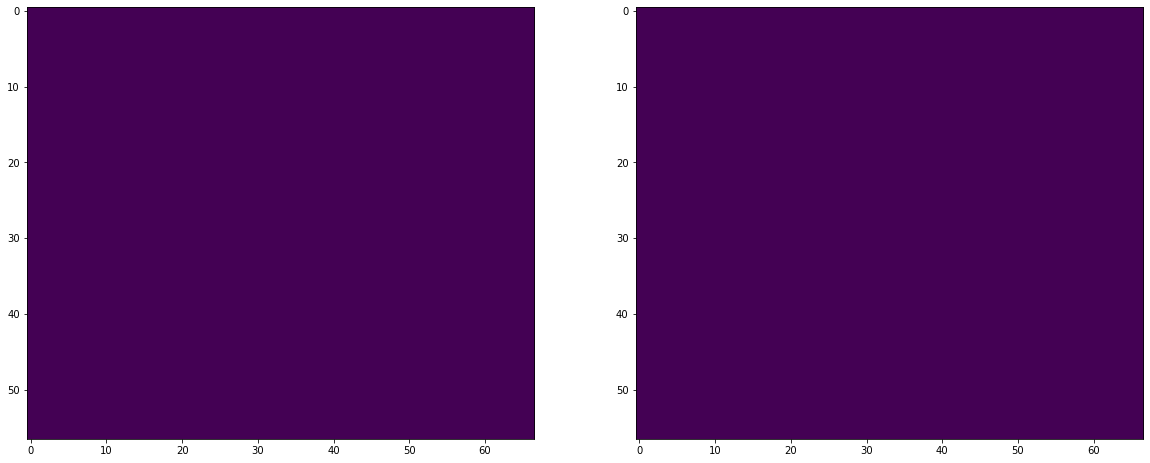

In [254]:
for t in range(54):
    plt.figure(figsize=(20,20)) 
    plots = [convex[:,:,t], cropmask[:,:,t]]
    for i in range(len(plots)):
        plt.subplot(1,len(plots), i+1)
        plt.imshow(plots[i])
    plt.show()
    clear_output(wait=True)

In [43]:
c.saveNifti(cropmask,{"x_res":0,"y_res":0, "z_res":0}, 
            f"/Users/dvarelat/Documents/MASTER/TFM/DATA/EXTRACTION/otros/20190404_E2_MASK_{n}.nii.gz")


In [48]:
c.saveNifti(croporiginal,{"x_res":0,"y_res":0, "z_res":0}, 
            f"/Users/dvarelat/Documents/MASTER/TFM/DATA/EXTRACTION/otros/20190404_E2_croporiginal_MEM_{n}.nii.gz")


In [58]:
c.saveNifti(cropmask_NU,
            {"x_res":0,"y_res":0, "z_res":0}, 
            f"/Users/dvarelat/Documents/MASTER/TFM/DATA/EXTRACTION/otros/20190404_E2_cropmask_NU_{n}.nii.gz")
